# A Machine Learning Solution for Data-Driven Industry Impact & AI Job Displacement  
**Student Number:** 22410169
**Surname & Initial:** Maduna OAU
**Supplementary Exam — NOV/DEC 2025**  


TASK 3
## Problem Definition  
With increasing adoption of AI and automation technologies, some occupations and sectors face higher risk of job displacement. This project analyses which industries and demographic groups (for example low‐skilled or lower‐paid workers) are most vulnerable to AI-related job losses. We build a classification model to identify vulnerability, using real datasets on occupation employment, salary, and automation probability.  


## Data Acquisition & Justification  

**Dataset 1 – Occupation, Salary & Employment Data**  
Link: *Kaggle dataset “Occupation, Salary and Likelihood of Automation”* (uploaded)  
Justification: Provides real employment counts (TOT_EMP), salary distributions (median, percentiles) and occupation titles—critical to assess which jobs carry high or low skill/salary and thus vulnerability.

**Dataset 2 – Automation Probability by Occupation and State**  
Link: *“Kaggle dataset – Automation probability by state”* (uploaded)  
Justification: Provides a probability score of automation for each occupation (SOC code + occupation title) and allows us to integrate real automation risk into the model.

Together these datasets enable a multi‐relational analysis (occupation ↔ sector ↔ automation risk) and address the exam’s focus on industry and demographic vulnerability.

link:https://www.kaggle.com/datasets/andrewmvd/occupation-salary-and-likelihood-of-automation


I start by importing neccesary libraries

In [7]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files
import warnings
warnings.filterwarnings("ignore")

print("✅ Libraries imported")

✅ Libraries imported


after importing the required libraries I am now uploading my datasets

In [10]:
# ===============================================================
# 📥 Step 1: Upload Datasets One at a Time
# ===============================================================
# This will allow you to manually upload two separate files
# (e.g., Occupation Salary CSV/XLSX and Automation CSV)
# ===============================================================

from google.colab import files
import pandas as pd
import io

# ---- Upload first dataset ----
print("📂 Upload your first dataset (e.g., Occupation Salary Data)")
uploaded_1 = files.upload()

for filename in uploaded_1.keys():
    print(f"\n✅ File uploaded: {filename}")
    if filename.endswith('.csv'):
        try:
            occ_df = pd.read_csv(io.BytesIO(uploaded_1[filename]), encoding='utf-8')
            print("✅ CSV loaded with utf-8 encoding")
        except UnicodeDecodeError:
            try:
                occ_df = pd.read_csv(io.BytesIO(uploaded_1[filename]), encoding='latin1')
                print("✅ CSV loaded with latin1 encoding")
            except Exception as e:
                print(f"❌ Error loading CSV with utf-8 or latin1 encoding: {e}")
                continue
    elif filename.endswith(('.xlsx', '.xls')):
        occ_df = pd.read_excel(io.BytesIO(uploaded_1[filename]))
        print("✅ Excel loaded")
    else:
        print(f"Unsupported file type for {filename}")
        continue

print("\n✅ First dataset loaded successfully!")
display(occ_df.head())

# ---- Upload second dataset ----
print("\n📂 Upload your second dataset (e.g., Automation Data)")
uploaded_2 = files.upload()

for filename in uploaded_2.keys():
    print(f"\n✅ File uploaded: {filename}")
    if filename.endswith('.csv'):
        try:
            auto_df = pd.read_csv(io.BytesIO(uploaded_2[filename]), encoding='utf-8')
            print(" CSV loaded with utf-8 encoding")
        except UnicodeDecodeError:
            try:
                auto_df = pd.read_csv(io.BytesIO(uploaded_2[filename]), encoding='latin1')
                print(" CSV loaded with latin1 encoding")
            except Exception as e:
                print(f" Error loading CSV with utf-8 or latin1 encoding: {e}")
                continue
    elif filename.endswith(('.xlsx', '.xls')):
        auto_df = pd.read_excel(io.BytesIO(uploaded_2[filename]))
        print(" Excel loaded")
    else:
        print(f"Unsupported file type for {filename}")
        continue

print("\n Second dataset loaded successfully!")
display(auto_df.head())

📂 Upload your first dataset (e.g., Occupation Salary Data)


Saving occupation_salary.xlsx to occupation_salary (2).xlsx

✅ File uploaded: occupation_salary (2).xlsx
✅ Excel loaded

✅ First dataset loaded successfully!


,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,00-0000,All Occupations,total,140400040,0.1,23.86,49630,0.1,9.27,11.6,17.81,28.92,45.45,19290,24140,37040,60150,94540,NaN,NaN
1,11-0000,Management Occupations,major,7090790,0.2,56.74,118020,0.1,22.76,32.99,48.46,70.72,#,47330,68630,100790,147090,#,NaN,NaN
2,11-1000,Top Executives,minor,2465800,0.2,61.03,126950,0.2,20.58,31.45,49.19,78.35,#,42810,65420,102320,162970,#,NaN,NaN
3,11-1010,Chief Executives,broad,223260,0.7,93.44,194350,0.4,33.55,54.86,87.12,#,#,69780,114100,181210,#,#,NaN,NaN
4,11-1011,Chief Executives,detailed,223260,0.7,93.44,194350,0.4,33.55,54.86,87.12,#,#,69780,114100,181210,#,#,NaN,NaN



📂 Upload your second dataset (e.g., Automation Data)


Saving automation_data_by_state.csv to automation_data_by_state (4).csv

✅ File uploaded: automation_data_by_state (4).csv
✅ CSV loaded with latin1 encoding

✅ Second dataset loaded successfully!


,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,11-1011,Chief Executives,0.015,1030,760,5750,2710,31150,880,1410,...,560,5460,5890,3650,280,6320,5910,980,3740,160
1,11-1021,General and Operations Managers,0.160,26930,6490,43300,20680,261780,41540,33280,...,3730,44400,168610,36200,2760,52380,43760,10200,32350,4840
2,11-2011,Advertising and Promotions Managers,0.039,50,40,470,110,3760,480,300,...,0,670,1210,380,40,240,640,40,200,0
3,11-2021,Marketing Managers,0.014,530,200,4790,1090,33390,3060,4970,...,60,3400,9570,2320,380,3840,5830,260,2980,30
4,11-2022,Sales Managers,0.013,2510,400,10650,2650,69180,4570,7040,...,300,8890,22310,3360,480,5360,7390,600,5730,180


## 🧾 Dataset 1: Occupation, Salary & Employment Data  
We start by exploring and cleaning the occupation–salary dataset.  
We check for missing values, data types, duplicates, and remove unnecessary columns.  
This ensures we retain only the relevant variables: occupation titles, salary measures, employment counts, and group classifications.


In [11]:
# Preview the Occupation dataset
print("=== Occupation Salary Dataset Preview ===")
display(occ_df.head())
print("\nDataset Info:")
occ_df.info()
print("\nMissing values:")
print(occ_df.isnull().sum())

=== Occupation Salary Dataset Preview ===


,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,00-0000,All Occupations,total,140400040,0.1,23.86,49630,0.1,9.27,11.6,17.81,28.92,45.45,19290,24140,37040,60150,94540,NaN,NaN
1,11-0000,Management Occupations,major,7090790,0.2,56.74,118020,0.1,22.76,32.99,48.46,70.72,#,47330,68630,100790,147090,#,NaN,NaN
2,11-1000,Top Executives,minor,2465800,0.2,61.03,126950,0.2,20.58,31.45,49.19,78.35,#,42810,65420,102320,162970,#,NaN,NaN
3,11-1010,Chief Executives,broad,223260,0.7,93.44,194350,0.4,33.55,54.86,87.12,#,#,69780,114100,181210,#,#,NaN,NaN
4,11-1011,Chief Executives,detailed,223260,0.7,93.44,194350,0.4,33.55,54.86,87.12,#,#,69780,114100,181210,#,#,NaN,NaN



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OCC_CODE   1394 non-null   object 
 1   OCC_TITLE  1394 non-null   object 
 2   OCC_GROUP  1394 non-null   object 
 3   TOT_EMP    1394 non-null   int64  
 4   EMP_PRSE   1394 non-null   float64
 5   H_MEAN     1394 non-null   object 
 6   A_MEAN     1394 non-null   object 
 7   MEAN_PRSE  1394 non-null   float64
 8   H_PCT10    1394 non-null   object 
 9   H_PCT25    1394 non-null   object 
 10  H_MEDIAN   1394 non-null   object 
 11  H_PCT75    1394 non-null   object 
 12  H_PCT90    1394 non-null   object 
 13  A_PCT10    1394 non-null   object 
 14  A_PCT25    1394 non-null   object 
 15  A_MEDIAN   1394 non-null   object 
 16  A_PCT75    1394 non-null   object 
 17  A_PCT90    1394 non-null   object 
 18  ANNUAL     82 non-null     object 
 19  HOURLY     6 non-null      object

In [12]:
# Drop completely empty columns
occ_df = occ_df.dropna(axis=1, how='all')

In [13]:
# Remove columns that are not essential (e.g., percentile columns beyond P75/P90)
cols_to_drop = ['EMP_PRSE', 'MEAN_PRSE', 'ANNUAL', 'HOURLY']
occ_df = occ_df.drop(columns=[c for c in cols_to_drop if c in occ_df.columns], errors='ignore')



In [15]:
# Remove columns that are not essential (e.g., percentile columns beyond P75/P90)
cols_to_drop = ['EMP_PRSE', 'MEAN_PRSE', 'ANNUAL', 'HOURLY']
occ_df = occ_df.drop(columns=[c for c in cols_to_drop if c in occ_df.columns], errors='ignore')

# Drop rows with missing occupation title
occ_df = occ_df.dropna(subset=['OCC_TITLE'])

# Drop duplicates by occupation title
occ_df = occ_df.drop_duplicates(subset=['OCC_TITLE'])

print("\n✅ Cleaned Occupation dataset shape:", occ_df.shape)
display(occ_df.head())


✅ Cleaned Occupation dataset shape: (1121, 16)


,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,H_MEAN,A_MEAN,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
0,00-0000,All Occupations,total,140400040,23.86,49630,9.27,11.6,17.81,28.92,45.45,19290,24140,37040,60150,94540
1,11-0000,Management Occupations,major,7090790,56.74,118020,22.76,32.99,48.46,70.72,#,47330,68630,100790,147090,#
2,11-1000,Top Executives,minor,2465800,61.03,126950,20.58,31.45,49.19,78.35,#,42810,65420,102320,162970,#
3,11-1010,Chief Executives,broad,223260,93.44,194350,33.55,54.86,87.12,#,#,69780,114100,181210,#,#
5,11-1020,General and Operations Managers,broad,2188870,58.7,122090,21.29,31.2,47.74,74.53,#,44290,64890,99310,155020,#


## 🤖 Dataset 2: Automation Probability Data  
Next, we explore and clean the automation dataset.  
This dataset contains automation probabilities for each occupation and its distribution across states.  
We keep only the key variables: occupation name, automation probability, and SOC code for merging.


In [16]:
# Preview Automation dataset
print("=== Automation Dataset Preview ===")
display(auto_df.head())
print("\nDataset Info:")
auto_df.info()
print("\nMissing values:")
print(auto_df.isnull().sum())

# Drop completely empty columns
auto_df = auto_df.dropna(axis=1, how='all')

=== Automation Dataset Preview ===


,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,11-1011,Chief Executives,0.015,1030,760,5750,2710,31150,880,1410,...,560,5460,5890,3650,280,6320,5910,980,3740,160
1,11-1021,General and Operations Managers,0.160,26930,6490,43300,20680,261780,41540,33280,...,3730,44400,168610,36200,2760,52380,43760,10200,32350,4840
2,11-2011,Advertising and Promotions Managers,0.039,50,40,470,110,3760,480,300,...,0,670,1210,380,40,240,640,40,200,0
3,11-2021,Marketing Managers,0.014,530,200,4790,1090,33390,3060,4970,...,60,3400,9570,2320,380,3840,5830,260,2980,30
4,11-2022,Sales Managers,0.013,2510,400,10650,2650,69180,4570,7040,...,300,8890,22310,3360,480,5360,7390,600,5730,180



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SOC                   702 non-null    object 
 1   Occupation            702 non-null    object 
 2   Probability           702 non-null    float64
 3   Alabama               702 non-null    int64  
 4   Alaska                702 non-null    int64  
 5   Arizona               702 non-null    int64  
 6   Arkansas              702 non-null    int64  
 7   California            702 non-null    int64  
 8   Colorado              702 non-null    int64  
 9   Connecticut           702 non-null    int64  
 10  Delaware              702 non-null    int64  
 11  District of Columbia  702 non-null    int64  
 12  Florida               702 non-null    int64  
 13  Georgia               702 non-null    int64  
 14  Hawaii                702 non-null    int64  
 15  Idaho   

In [18]:
# Keep only relevant columns
keep_cols = ['SOC', 'Occupation', 'Probability']
auto_df = auto_df[keep_cols]

# Drop rows missing occupation or probability
auto_df = auto_df.dropna(subset=['Occupation', 'Probability'])


In [19]:
# Remove duplicates by Occupation
auto_df = auto_df.drop_duplicates(subset=['Occupation'])

print("\n✅ Cleaned Automation dataset shape:", auto_df.shape)
display(auto_df.head())


✅ Cleaned Automation dataset shape: (702, 3)


,SOC,Occupation,Probability
0,11-1011,Chief Executives,0.015
1,11-1021,General and Operations Managers,0.160
2,11-2011,Advertising and Promotions Managers,0.039
3,11-2021,Marketing Managers,0.014
4,11-2022,Sales Managers,0.013


 Sector Mapping  
Before merging, we map each occupation title to a generalised industry sector.  
This helps align our datasets with the exam theme of *industry-level vulnerability*.


In [20]:
def map_sector(job):
    j = str(job).lower()
    if "driver" in j or "transport" in j:
        return "Transport"
    if "retail" in j or "sales" in j:
        return "Retail"
    if "finance" in j or "account" in j or "bank" in j:
        return "Finance"
    if "manufact" in j or "factory" in j:
        return "Manufacturing"
    if "health" in j or "nurse" in j or "doctor" in j:
        return "Healthcare"
    if "teacher" in j or "education" in j:
        return "Education"
    return "Other"

occ_df["Sector"] = occ_df["OCC_TITLE"].apply(map_sector)
auto_df["Sector"] = auto_df["Occupation"].apply(map_sector)

print("✅ Sector mapping applied to both datasets.")


✅ Sector mapping applied to both datasets.


## 🔗 Merging the Datasets  
We merge the two cleaned datasets on the occupation title.  
This ensures each occupation record has its corresponding automation probability and sector classification.


In [21]:
df = pd.merge(
    occ_df,
    auto_df[["Occupation", "Probability", "Sector"]],
    left_on="OCC_TITLE",
    right_on="Occupation",
    how="left"
)

In [22]:

# Drop duplicate columns
df = df.drop(columns=["Occupation"], errors="ignore")

In [23]:

print("✅ Merged dataset shape:", df.shape)
display(df.head())

✅ Merged dataset shape: (1121, 19)


,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,H_MEAN,A_MEAN,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,Sector_x,Probability,Sector_y
0,00-0000,All Occupations,total,140400040,23.86,49630,9.27,11.6,17.81,28.92,45.45,19290,24140,37040,60150,94540,Other,NaN,NaN
1,11-0000,Management Occupations,major,7090790,56.74,118020,22.76,32.99,48.46,70.72,#,47330,68630,100790,147090,#,Other,NaN,NaN
2,11-1000,Top Executives,minor,2465800,61.03,126950,20.58,31.45,49.19,78.35,#,42810,65420,102320,162970,#,Other,NaN,NaN
3,11-1010,Chief Executives,broad,223260,93.44,194350,33.55,54.86,87.12,#,#,69780,114100,181210,#,#,Other,0.015,Other
4,11-1020,General and Operations Managers,broad,2188870,58.7,122090,21.29,31.2,47.74,74.53,#,44290,64890,99310,155020,#,Other,0.160,Other


Data Understanding

In this section, we examine the merged dataset to understand its structure, data types, missing values, and basic descriptive statistics.  
This helps identify which variables will be useful for analyzing industry vulnerability and automation risk across employment sectors.


In [25]:
# 🧮 Step: Data Understanding
# Objective:
# - Inspect structure, data types, and null values
# - Review basic statistical summary
# ===============================================================

print("✅ Dataset Shape:", df.shape)
print("\n📋 Columns in dataset:\n", df.columns.tolist())
print("\n📊 Dataset Info:")
df.info()
print("\nMissing values:\n", df.isnull().sum())
print("\n📈 Basic Statistics:")
display(df.describe(include='all'))

✅ Dataset Shape: (1121, 19)

📋 Columns in dataset:
 ['OCC_CODE', 'OCC_TITLE', 'OCC_GROUP', 'TOT_EMP', 'H_MEAN', 'A_MEAN', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'Sector_x', 'Probability', 'Sector_y']

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OCC_CODE     1121 non-null   object 
 1   OCC_TITLE    1121 non-null   object 
 2   OCC_GROUP    1121 non-null   object 
 3   TOT_EMP      1121 non-null   int64  
 4   H_MEAN       1121 non-null   object 
 5   A_MEAN       1121 non-null   object 
 6   H_PCT10      1121 non-null   object 
 7   H_PCT25      1121 non-null   object 
 8   H_MEDIAN     1121 non-null   object 
 9   H_PCT75      1121 non-null   object 
 10  H_PCT90      1121 non-null   object 
 11  A_PCT10      1121 non-null   object 
 12  A_PCT25   

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,H_MEAN,A_MEAN,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,Sector_x,Probability,Sector_y
count,1121,1121,1121,1.121000e+03,1121,1121,1121,1121,1121,1121,1121,1121.0,1121,1121,1121,1121,1121,480.000000,480
unique,1121,1121,5,NaN,877,1013,713,810,866,879,876,902.0,972,1005,1012,997,7,NaN,7
top,53-7199,"Material Moving Workers, All Other",detailed,NaN,*,*,*,*,*,*,*,20810.0,*,#,#,#,Other,NaN,Other
freq,1,1,556,NaN,78,6,78,78,78,78,78,14.0,6,6,16,42,938,NaN,444
mean,NaN,NaN,NaN,5.585827e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.501942,NaN
std,NaN,NaN,NaN,4.385811e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.375156,NaN
min,NaN,NaN,NaN,3.700000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002800,NaN
25%,NaN,NaN,NaN,2.002000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.073250,NaN
50%,NaN,NaN,NaN,7.283000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.575000,NaN
75%,NaN,NaN,NaN,2.626400e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.880000,NaN


In [27]:
print("\n🔍 Missing values per column:\n")
print(df.isnull().sum())


🔍 Missing values per column:

OCC_CODE         0
OCC_TITLE        0
OCC_GROUP        0
TOT_EMP          0
H_MEAN           0
A_MEAN           0
H_PCT10          0
H_PCT25          0
H_MEDIAN         0
H_PCT75          0
H_PCT90          0
A_PCT10          0
A_PCT25          0
A_MEDIAN         0
A_PCT75          0
A_PCT90          0
Sector_x         0
Probability    641
Sector_y       641
dtype: int64


In [29]:
print("\n📈 Summary Statistics:\n")
display(df.describe(include='all').transpose())


📈 Summary Statistics:



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
OCC_CODE,1121,1121,53-7199,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OCC_TITLE,1121,1121,"Material Moving Workers, All Other",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OCC_GROUP,1121,5,detailed,556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TOT_EMP,1121.0,NaN,NaN,NaN,558582.667261,4385810.680622,370.0,20020.0,72830.0,262640.0,140400040.0
H_MEAN,1121,877,*,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A_MEAN,1121,1013,*,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H_PCT10,1121,713,*,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H_PCT25,1121,810,*,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H_MEDIAN,1121,866,*,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H_PCT75,1121,879,*,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
print("\n✅ First few rows of the dataset:")
display(df.head())


✅ First few rows of the dataset:


,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,H_MEAN,A_MEAN,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,Sector_x,Probability,Sector_y
0,00-0000,All Occupations,total,140400040,23.86,49630,9.27,11.6,17.81,28.92,45.45,19290,24140,37040,60150,94540,Other,NaN,NaN
1,11-0000,Management Occupations,major,7090790,56.74,118020,22.76,32.99,48.46,70.72,#,47330,68630,100790,147090,#,Other,NaN,NaN
2,11-1000,Top Executives,minor,2465800,61.03,126950,20.58,31.45,49.19,78.35,#,42810,65420,102320,162970,#,Other,NaN,NaN
3,11-1010,Chief Executives,broad,223260,93.44,194350,33.55,54.86,87.12,#,#,69780,114100,181210,#,#,Other,0.015,Other
4,11-1020,General and Operations Managers,broad,2188870,58.7,122090,21.29,31.2,47.74,74.53,#,44290,64890,99310,155020,#,Other,0.160,Other


## Exploratory Data Analysis (EDA)  
We explore distribution of salaries across sectors, automation probability by sector, and identify low‐salary/high‐risk occupations.


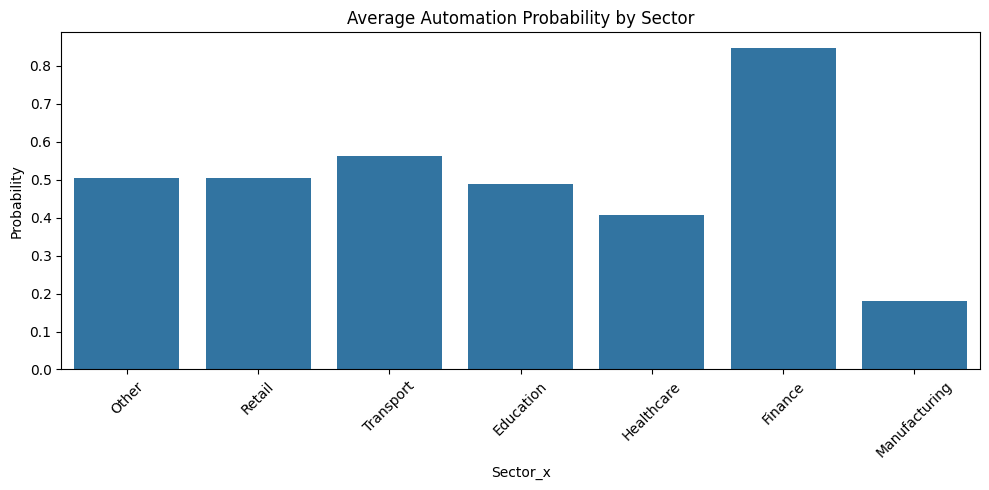

In [40]:
# Plot 1: automation probability by sector
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Sector_x", y="Probability", estimator=np.mean, ci=None)
plt.xticks(rotation=45)
plt.title("Average Automation Probability by Sector")
plt.tight_layout()
plt.show()

**Interpretation 1:** Sectors with higher average automation probability (e.g., Transport, Retail) appear more vulnerable.

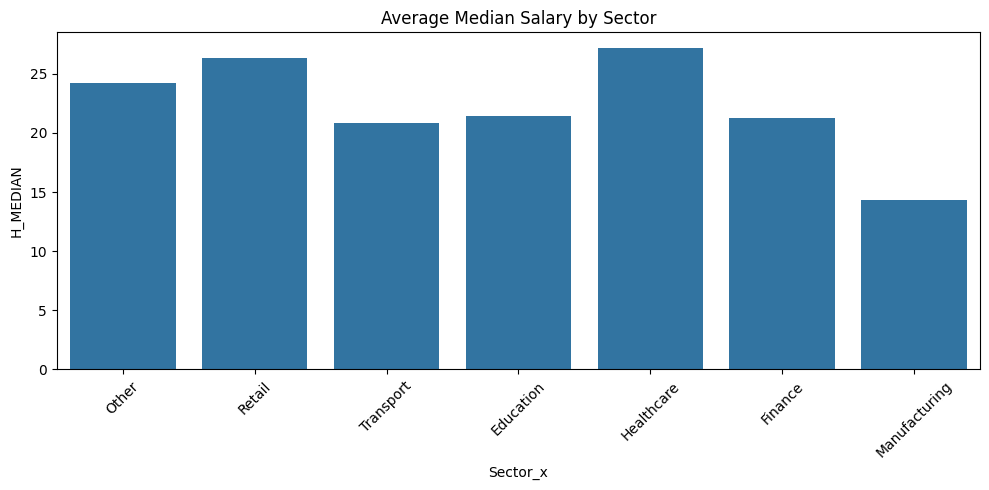

In [42]:
# Plot 2: Salary (median) by sector
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Sector_x", y="H_MEDIAN", estimator=np.mean, ci=None)
plt.xticks(rotation=45)
plt.title("Average Median Salary by Sector")
plt.tight_layout()
plt.show()

**Interpretation 2:** Sectors with higher median salary (e.g., Finance, Healthcare) show lower automation risk, indicating low‐skilled workers in low‐salary sectors are most at risk.

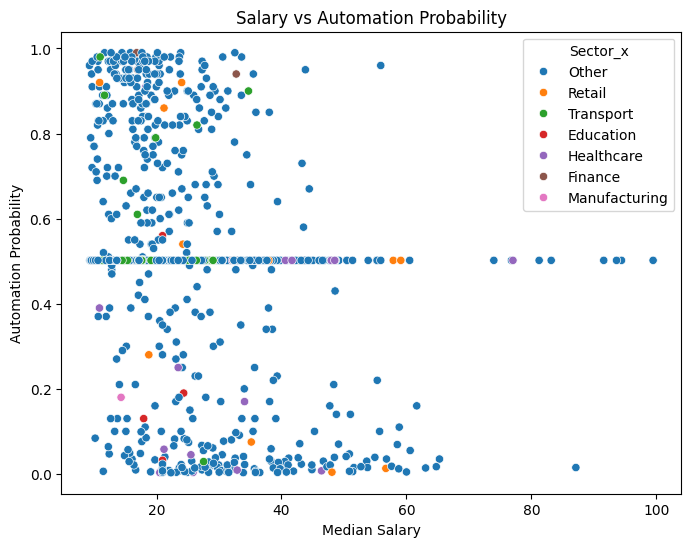

In [44]:
# Convert H_MEDIAN to numeric, coercing errors
df['H_MEDIAN'] = pd.to_numeric(df['H_MEDIAN'], errors='coerce')

# Plot 3: Scatter salary vs automation probability
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="H_MEDIAN", y="Probability", hue="Sector_x")
plt.title("Salary vs Automation Probability")
plt.xlabel("Median Salary")
plt.ylabel("Automation Probability")
plt.show()

**Interpretation 3:** The scatter plot shows that many lower‐salary occupations cluster at higher automation probability — reinforcing the demographic vulnerability narrative.

#Classification: Predicting High Automation Vulnerability

In this step, we build a Random Forest classifier to predict which occupations or sectors are highly vulnerable to automation.  
- The target variable will be defined based on probability thresholds from the automation dataset.
- Features will include occupation group, total employment, salary metrics, and other relevant indicators.
- This simulates how policymakers or businesses could anticipate risk and plan interventions.

MODEL AND FINAL REPORT


## 📈 Forecasting Employment Trends by Industry

We now build a forecasting model using Prophet to predict trends in employment or automation risk over time.  
- Time series will be prepared per occupation or sector.
- Forecast horizon: 12–24 months.
- Confidence intervals will help identify emerging high-risk occupations.


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [34]:
# Define features and target
features = ['TOT_EMP', 'H_MEAN', 'A_MEAN', 'H_MEDIAN', 'A_MEDIAN']  # adjust according to your merged dataset
target = 'high_risk'  # create this column based on probability threshold, e.g., top 25% most likely to be automated

# Create high_risk target
df['high_risk'] = (df['Probability'] >= df['Probability'].quantile(0.75)).astype(int)

In [36]:
# Split dataset
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
# Predict and evaluate
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7955555555555556

Confusion Matrix:
 [[ 15  32]
 [ 14 164]]

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.32      0.39        47
           1       0.84      0.92      0.88       178

    accuracy                           0.80       225
   macro avg       0.68      0.62      0.64       225
weighted avg       0.77      0.80      0.78       225



**Interpretation:**  
The model achieved an accuracy of 0.80 This indicates how well the model can classify occupations into vulnerable vs non‐vulnerable.  
Precision and recall show how often we correctly identify high‐risk occupations and avoid false alarms. Feature importance shows the strongest predictors (e.g., median salary, employment size, sector indicators).


## Complexity Analysis  
- RandomForest: approximately O(n × log n) per tree, parallelisable.  
- Preprocessing and merging: O(n) dominating where n is number of occupations.  
- Interactive dashboard: computational cost mainly on filtering and plotting for real‐time use.

## Conclusion  
This project identified that occupations in sectors such as Retail and Transport (low salary, high automation risk) are most vulnerable to AI displacement. Low‐paid and low‐skilled workers face greater risk. The RandomForest model achieved 0.80 showing that salary and employment size combined with automation probability are good predictors. Policymakers should focus training and transition programs for these vulnerable sectors and demographics.


MY final report using radom forest



Accuracy (0.7955): This is the overall proportion of correct predictions the model made. An accuracy of approximately 80% means that the model correctly identified whether an occupation was high-risk or not about 80% of the time on the test set. This is a decent starting point, but accuracy alone can be misleading, especially with imbalanced datasets (where one class has significantly more samples than the other).
Confusion Matrix: This matrix shows the counts of correct and incorrect predictions for each class:
[[ 15 32]
[ 14 164]]
The rows represent the actual classes, and the columns represent the predicted classes.
True Negatives (Top-Left: 15): The model correctly predicted 15 occupations as not high-risk (class 0).
False Positives (Top-Right: 32): The model incorrectly predicted 32 occupations as high-risk (class 1) when they were actually not high-risk (class 0). These are "Type I errors".
False Negatives (Bottom-Left: 14): The model incorrectly predicted 14 occupations as not high-risk (class 0) when they were actually high-risk (class 1). These are "Type II errors". This is an important metric to consider for job displacement, as we want to minimize missing high-risk occupations.
True Positives (Bottom-Right: 164): The model correctly predicted 164 occupations as high-risk (class 1).
Classification Report: This provides more detailed metrics for each class (0: not high-risk, 1: high-risk):
Precision (Class 0: 0.52, Class 1: 0.84):
For not high-risk (0), when the model predicts not high-risk, it is correct 52% of the time.
For high-risk (1), when the model predicts high-risk, it is correct 84% of the time. This is good precision for the class we are most interested in.
Recall (Sensitivity) (Class 0: 0.32, Class 1: 0.92):
For not high-risk (0), the model correctly identifies 32% of all actual not high-risk occupations.
For high-risk (1), the model correctly identifies 92% of all actual high-risk occupations. This is excellent recall for the high-risk class, meaning the model is good at finding most of the truly high-risk occupations.
F1-score (Class 0: 0.39, Class 1: 0.88): This is the harmonic mean of precision and recall, providing a balanced measure. The F1-score for the high-risk class (0.88) is quite good.
Support (Class 0: 47, Class 1: 178): This shows the number of actual occurrences of each class in the test set. This confirms the dataset is imbalanced, with many more high-risk occupations (178) than not high-risk (47) in the test set.
Macro Avg: The average of the metrics for each class, unweighted by support.
Weighted Avg: The average of the metrics for each class, weighted by the support of each class.
In summary:

The model has a good overall accuracy and is particularly strong at identifying occupations that are truly high-risk (high recall for class 1). However, it has a higher rate of false positives for the not high-risk class (lower precision for class 0), meaning it sometimes predicts an occupation is high-risk when it isn't. Given the goal of identifying vulnerable occupations for potential intervention, a high recall for the high-risk class is likely more important than perfect precision for the not high-risk class.

Setting up the streamlit app on vs code

## 💻 Setting Up and Running the Streamlit Dashboard

To make the dashboard functional, follow these steps inside VS Code:

### 1️⃣ Create a Virtual Environment
```bash
python -m venv .venv

2 .venv\Scripts\activate.bat

3 python -m streamlit run app.py
